<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/historical_volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance --q

In [3]:
import yfinance as yf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the Nifty symbol and time period
nifty_symbol = "^NSEI"
end_date = "2023-07-30"  # End date of the 30-day period

# Fetch historical Nifty data from Yahoo Finance for the past one year
start_date = pd.to_datetime(end_date) - pd.DateOffset(years=1)
nifty_data = yf.download(nifty_symbol, start=start_date, end=end_date)

# Calculate daily logarithmic returns
nifty_data["Log_Returns"] = np.log(nifty_data["Close"] / nifty_data["Close"].shift(1))

# Calculate 30-day rolling standard deviation of logarithmic returns
rolling_std = nifty_data["Log_Returns"].rolling(window=30).std()

# Shift the rolling standard deviation values by 30 days to align with correct periods
historical_volatility_past_year = rolling_std.shift(30)

# Multiply by the square root of 252 to annualize the volatility
historical_volatility_past_year *= np.sqrt(252)

# Print the calculated historical volatility for each 30-day period over the past year
print(historical_volatility_past_year)


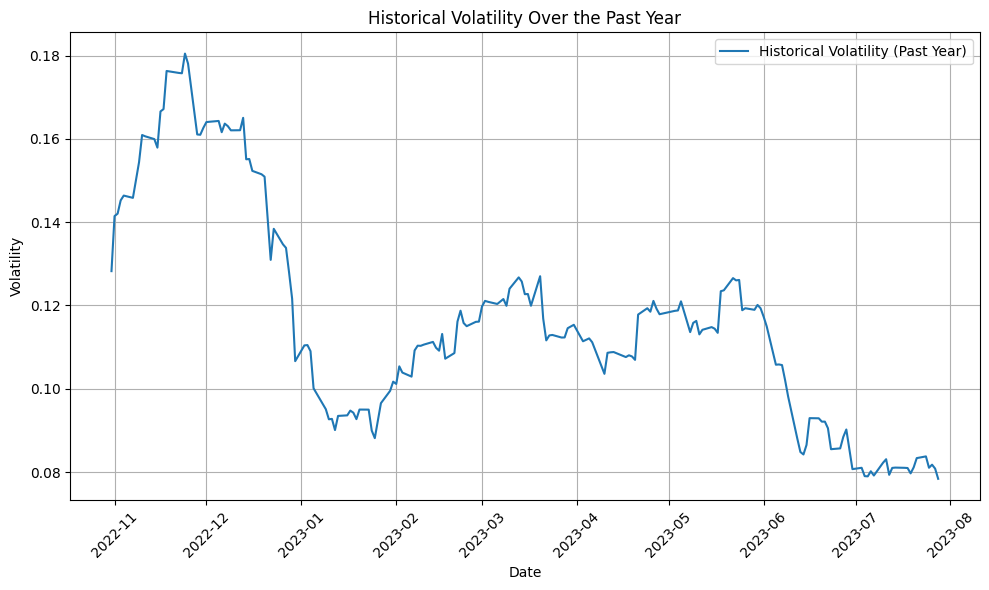

In [6]:
# Plot the historical volatility over the past year
plt.figure(figsize=(10, 6))
plt.plot(historical_volatility_past_year.index, historical_volatility_past_year.values, label='30 days Historical Volatility (Past Year)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('30 Days Historical Volatility Over the Past Year')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()